In [2]:
from deepdiff import DeepDiff
import json
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
with (open('results/logit-lens/DC/gpt2/colab_surprisal.json') as colab,
      open('results_orig/logit-lens/DC/gpt2/surprisal.json') as orig,
      open('results/logit-lens/DC/gpt2/local_surprisal.json') as local,
      open('data/DC/tokens.json') as data,
      open('results/logit-lens/DC/gpt2/encoding_local_surprisal.json') as encoding_local,
      open('results/logit-lens/DC/gpt2/normalize_surprisal.json') as normalize,
      open('results/logit-lens/DC/gpt2/corrected_surprisal.json') as corrected,
      open('results/logit-lens/DC/gpt2/corrected_noaccent_surprisal.json') as corrected_noaccent):
    colab = json.load(colab)
    orig = json.load(orig)
    local = json.load(local)
    data = json.load(data)
    encoding_local = json.load(encoding_local)
    normalize = json.load(normalize)
    corrected = json.load(corrected)
    corrected_noaccent = json.load(corrected_noaccent)

Checking for differences naively, we can see that the values differ:

In [13]:
DeepDiff(colab, orig, verbose_level=2)

{'values_changed': {"root['0']['2'][28][17]": {'new_value': 133.1817626953125,
   'old_value': 362.758544921875},
  "root['0']['2'][28][18]": {'new_value': 201.48512268066406,
   'old_value': 196.4712677001953},
  "root['0']['2'][28][19]": {'new_value': 361.98980712890625,
   'old_value': 363.36260986328125},
  "root['0']['2'][28][20]": {'new_value': 31.21578598022461,
   'old_value': 31.34165382385254},
  "root['0']['2'][28][21]": {'new_value': 38.52008056640625,
   'old_value': 38.37772750854492},
  "root['0']['2'][28][22]": {'new_value': 34.87126159667969,
   'old_value': 34.84913635253906},
  "root['0']['2'][28][23]": {'new_value': 61.2628173828125,
   'old_value': 61.7603759765625},
  "root['0']['2'][28][24]": {'new_value': 64.65974426269531,
   'old_value': 64.59362030029297},
  "root['0']['2'][28][25]": {'new_value': 37.54780578613281,
   'old_value': 37.288841247558594},
  "root['0']['2'][28][26]": {'new_value': 58.761749267578125,
   'old_value': 58.99134826660156},
  "root['0

Further looking at the difference in values per layer, we can see that in layer 0 (which would be the encoding layer) the values are identical for most part, and the values are mostly different in later layers.

In [14]:
def difference_per_layer(data1, data2,layer=0):
    """
    compare values one-by-one from two surprisal datasets
    :param data1: json dataset generated by run_gpt2.py
    :param data2: json dataset generated by run_gpt2.py
    :param layer_id: e.g. 0-12 for gpt2
    """
    layer_id = str(layer)
    for article_id, article in colab[layer_id].items():
        for i in range(len(article)):
            print(sum([x - y for x, y in zip(data1[layer_id][article_id][i], data2[layer_id][article_id][i])])/len(article[i]), end= ', ')

In [15]:
difference_per_layer(orig, colab,0)

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.555392519632975, 0.0, 0.0, -4.316378141704359, 0.0, 0.0, 0.0, 0.0, -6.25431882924047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [16]:
difference_per_layer(orig, colab,1)

-1.2687274387904575e-06, -1.986821492513021e-07, 6.971151932426121e-07, -1.574556032816569e-06, -3.814697265625e-06, -1.1225541432698567e-06, -1.589994172792177e-06, 8.735805749893188e-07, 2.0662943522135417e-07, 1.7484029134114583e-06, 1.0728836059570312e-06, 1.430511474609375e-06, 2.600929953835227e-07, 5.6028366088867184e-08, -1.416852076848348e-06, -3.2186508178710938e-06, 3.051498661870542e-07, -1.51164001888699e-06, -7.19366402461611e-07, 2.2649765014648436e-07, -1.5894571940104166e-07, 8.74462880586323e-07, 5.960464477539063e-08, -2.1722581651475694e-06, 6.935813210227273e-07, -5.602836608886719e-07, 6.357828776041666e-07, 5.0193385074013155e-08, 2.980232238769531e-07, -9.735425313313801e-07, -1.5043077014741443e-07, 2.51664055718316e-07, -4.7204749924795966e-07, -9.329422660495924e-07, 1.0093053181966146e-06, -5.513429641723633e-07, -7.529007761101974e-07, -1.5459954738616943e-07, 6.821420457628038e-07, 4.967053731282552e-07, 1.8266340096791585e-06, 9.281294686453683e-08, -1.70

In order to further understand how the values differ across the layers, the following function shows average, minimum, and maximum values per sentence and per token for every layer.

In [4]:
def diff_checker(data1,data2, epsilon = 5):
    """
    display overview of how the two surprisal datasets differ per layer and return a list of tokens which differ by more than epsilon
    :param data1: json dataset generated by run_gpt2.py
    :param data2: json dataset generated by run_gpt2.py
    :param epsilon: the minimum difference between values to return the corresponding position
    :return: list of tokens with position within a layer for which the difference between surprisal was higher than epsilon
    """
    outliers = dict()
    for layer_id in data1.keys():
        layer_outliers = list()
        avg_per_sentence = list()
        avg = list()
        for article_id, article in data1[layer_id].items():
            for i in range(len(article)):
                diff = [x - y for x, y in zip(data1[layer_id][article_id][i], data2[layer_id][article_id][i])]
                avg_per_sentence.append(sum(diff)/len(article[i]))
                avg.extend(diff)
                layer_outliers.extend([[article_id,i,x] for x in diff if abs(x)>epsilon])
        if len(layer_outliers)>0:
                outliers[layer_id] = layer_outliers

        table = PrettyTable()
        table.align = 'l'
        table.field_names = ["", "per sentence", "per token"]
        table.add_row(['average',sum(avg_per_sentence)/len(avg_per_sentence),sum(avg)/len(avg)])
        table.add_row(['min',min(avg_per_sentence),min(avg)])
        table.add_row(['max',max(avg_per_sentence),max(avg)])
        print(f'Layer: {layer_id}')
        print(table)
    return outliers

Using `diff_checker`, we can see that the differences seem to be between the original surprisal values from the authors. Comparing surprisals generated locally and on Google Colab do not differ nearly to the extent they differ from the original values.

In [85]:
outliers = diff_checker(colab,orig)
outliers

Layer: 0
+---------+----------------------+---------------------+
|         | per sentence         | per token           |
+---------+----------------------+---------------------+
| average | 0.023509640868916038 | 0.03495422165570374 |
| min     | -0.23981843171296297 | -6.47509765625      |
| max     | 7.9738597040591035   | 229.5767822265625   |
+---------+----------------------+---------------------+
Layer: 1
+---------+-------------------------+----------------------+
|         | per sentence            | per token            |
+---------+-------------------------+----------------------+
| average | 0.005201310676613903    | 0.007362996289689614 |
| min     | -0.00015757083892822265 | -12.170173645019531  |
| max     | 2.3069889752761177      | 54.27845001220703    |
+---------+-------------------------+----------------------+
Layer: 2
+---------+-------------------------+---------------------+
|         | per sentence            | per token           |
+---------+----------------

{'0': [['2', 28, 229.5767822265625],
  ['2', 28, -5.01385498046875],
  ['2', 31, 163.03286743164062],
  ['2', 36, 181.09266662597656],
  ['5', 35, 182.77230834960938],
  ['5', 63, 150.8057403564453],
  ['5', 63, 8.960128784179688],
  ['6', 79, -6.47509765625],
  ['7', 23, 133.57568359375],
  ['7', 23, 43.331729888916016],
  ['10', 31, 153.3065185546875],
  ['16', 39, 172.5077133178711],
  ['17', 1, 136.1726531982422],
  ['17', 1, 37.513553619384766],
  ['17', 9, 205.0028076171875],
  ['18', 27, -6.444183349609375]],
 '1': [['2', 28, 44.77415466308594],
  ['2', 28, -12.170173645019531],
  ['2', 31, 34.24812698364258],
  ['2', 36, 40.490997314453125],
  ['5', 35, 52.60702896118164],
  ['5', 63, 36.24937438964844],
  ['6', 79, 5.2324371337890625],
  ['7', 23, 30.330005645751953],
  ['10', 31, 54.27845001220703],
  ['16', 39, 38.258975982666016],
  ['17', 1, 28.567459106445312],
  ['17', 9, 17.19305419921875],
  ['18', 27, 7.494209289550781]],
 '2': [['2', 28, 34.325965881347656],
  ['2', 

In [86]:
diff_checker(local,orig)

Layer: 0
+---------+----------------------+----------------------+
|         | per sentence         | per token            |
+---------+----------------------+----------------------+
| average | 0.023510964902870655 | 0.034955187724586605 |
| min     | -0.23982033906159578 | -6.475067138671875   |
| max     | 7.973858294279679    | 229.5767822265625    |
+---------+----------------------+----------------------+
Layer: 1
+---------+----------------------+---------------------+
|         | per sentence         | per token           |
+---------+----------------------+---------------------+
| average | 0.005059696160062224 | 0.00723005449040823 |
| min     | -0.000518798828125   | -12.170574188232422 |
| max     | 2.306836910869764    | 54.27813720703125   |
+---------+----------------------+---------------------+
Layer: 2
+---------+----------------------+----------------------+
|         | per sentence         | per token            |
+---------+----------------------+------------------

{'0': [['2', 28, 229.5767822265625],
  ['2', 28, -5.0138702392578125],
  ['2', 31, 163.03289794921875],
  ['2', 36, 181.0926055908203],
  ['5', 35, 182.77230834960938],
  ['5', 63, 150.80580139160156],
  ['5', 63, 8.960113525390625],
  ['6', 79, -6.475067138671875],
  ['7', 23, 133.57571411132812],
  ['7', 23, 43.331722259521484],
  ['10', 31, 153.30654907226562],
  ['16', 39, 172.50768280029297],
  ['17', 1, 136.1726531982422],
  ['17', 1, 37.513545989990234],
  ['17', 9, 205.00283813476562],
  ['18', 27, -6.44415283203125]],
 '1': [['2', 28, 44.77381134033203],
  ['2', 28, -12.170574188232422],
  ['2', 31, 34.24760818481445],
  ['2', 36, 40.49049377441406],
  ['5', 35, 52.60684585571289],
  ['5', 63, 36.249359130859375],
  ['6', 79, 5.23187255859375],
  ['7', 23, 30.32999038696289],
  ['10', 31, 54.27813720703125],
  ['16', 39, 38.25864028930664],
  ['17', 1, 28.56714630126953],
  ['17', 9, 17.193038940429688],
  ['18', 27, 7.494224548339844]],
 '2': [['2', 28, 34.325469970703125],
 

In [87]:
diff_checker(colab,local)

Layer: 0
+---------+-------------------------+------------------------+
|         | per sentence            | per token              |
+---------+-------------------------+------------------------+
| average | -1.3240339546242286e-06 | -9.660688828667681e-07 |
| min     | -4.57763671875e-05      | -0.0002288818359375    |
| max     | 1.0081699916294643e-05  | 0.00018310546875       |
+---------+-------------------------+------------------------+
Layer: 1
+---------+------------------------+------------------------+
|         | per sentence           | per token              |
+---------+------------------------+------------------------+
| average | 0.00014161451655167698 | 0.00013294179928138332 |
| min     | -1.1444091796875e-05   | -4.00543212890625e-05  |
| max     | 0.000518798828125      | 0.0015411376953125     |
+---------+------------------------+------------------------+
Layer: 2
+---------+------------------------+------------------------+
|         | per sentence           |

{}

To further investigate the difference, let's look what tokens are generating some of the values extracted by `diff_checker`.

In [5]:
def visualise_diff(source1,source2,layer_id,article,sentence,label1='data1', label2='data2'):
    """
    display a graph that plots surprisal values for each token in a sentence from two runs on the same dataset
    :param source1: json dataset generated by run_gpt2.py
    :param source2: json dataset generated by run_gpt2.py
    :param layer_id: LM layer at which we want to see the value
    :param article: index of an article within the dataset
    :param sentence: index of a sentence within the article
    """
    data1 = source1[str(layer_id)][str(article)][sentence]
    data2 = source2[str(layer_id)][str(article)][sentence]
    words = data[str(article)][sentence]

    x = np.arange(len(words))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, data1,width, label=label1)
    plt.bar(x + width/2, data2,width, label=label2)
    plt.legend()
    plt.xticks(x, words,rotation=90)
    plt.tight_layout()
    plt.show()

Using the values from `diff_checker`, we can, for example, look at the 28th sentence in the second article:

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


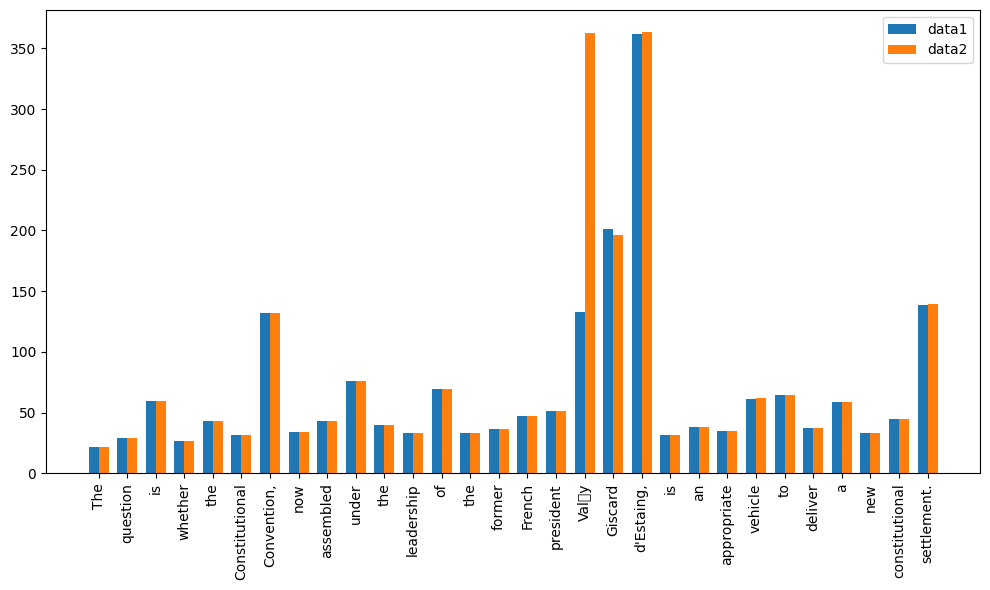

In [22]:
visualise_diff(orig, colab,0,2,28)

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_20023/346056233.py:14: UserWarning: Glyph 65326 (\N{FULLWIDTH LATIN CAPITAL LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65326 (\N{FULLWIDTH LATIN CAPITAL LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


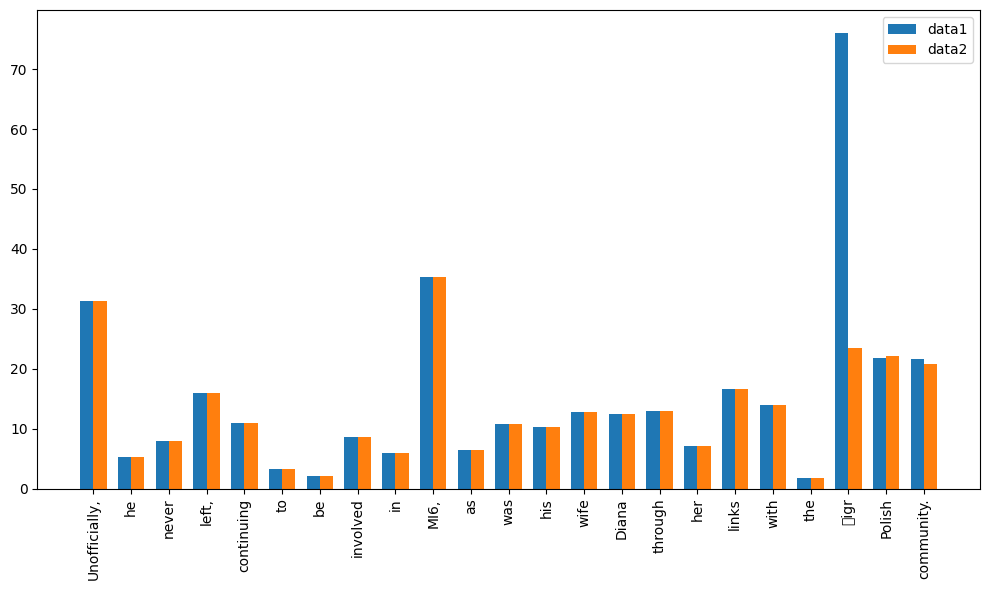

In [61]:
visualise_diff(colab,orig,1,5,35)

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65325 (\N{FULLWIDTH LATIN CAPITAL LETTER M}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 37101 (\N{CJK UNIFIED IDEOGRAPH-90ED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65325 (\N{FULLWI

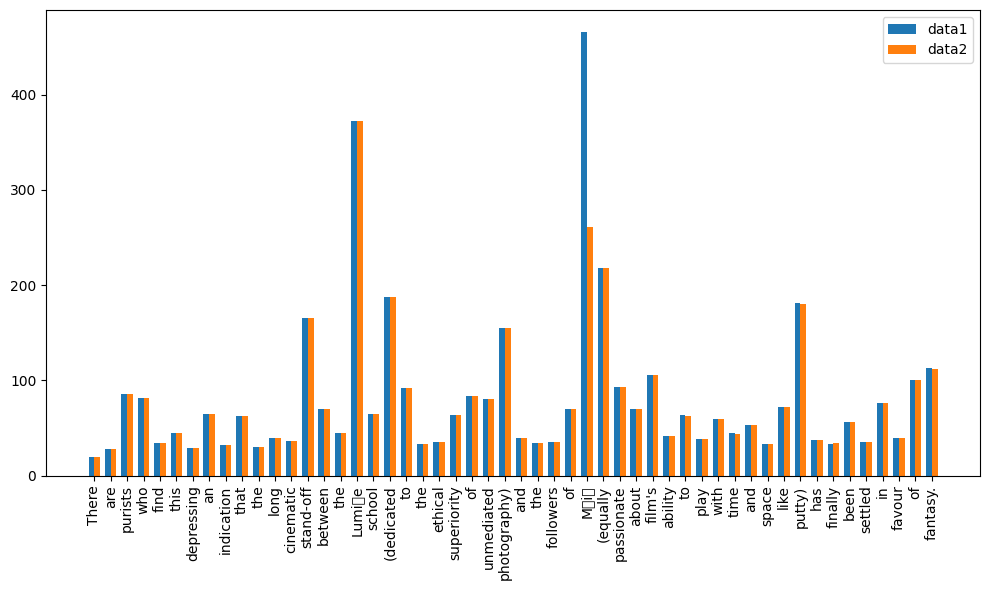

In [23]:
visualise_diff(colab,orig,0,17,9)

We can see that much higher surprisal values in the replication datasets are present in tokens which even in the visualisation seem to have an encoding issue, such as:

In [24]:
print(data['2'][28][17])
print(orig['0']['2'][28][17])
print(local['0']['2'][28][17])

ValＳy
133.1817626953125
362.758544921875


There seems to be an encoding issue in the `tokens.json` which was used as the input for the `run_gpt.py` script to calculate the surprisal values.
Attempting to resolve this issue by using explicit utf-8 encoding and using unicode normalisation does not yield any substantial changes:

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


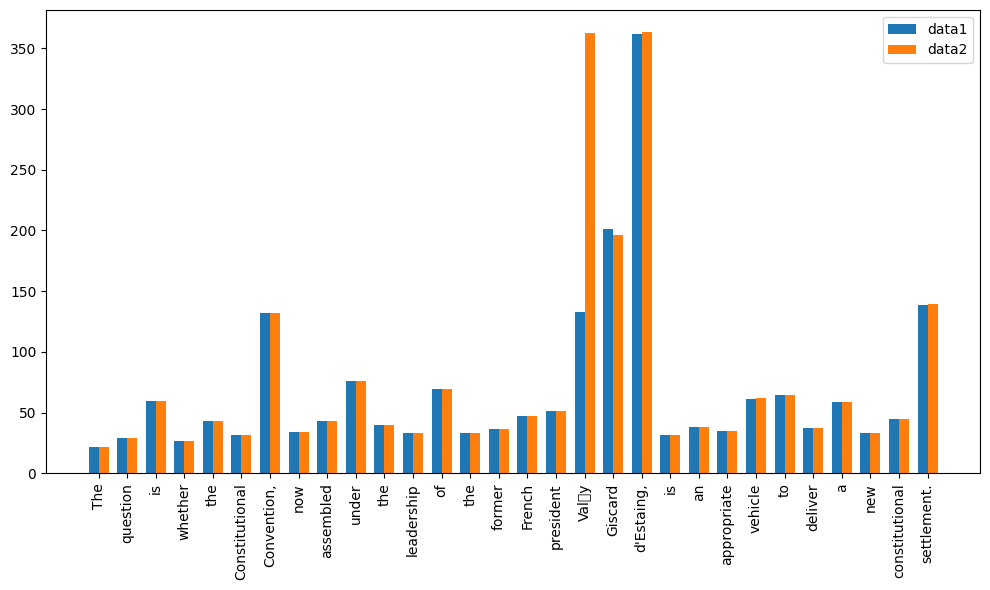

In [25]:
visualise_diff(orig,encoding_local, 0,2,28)

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


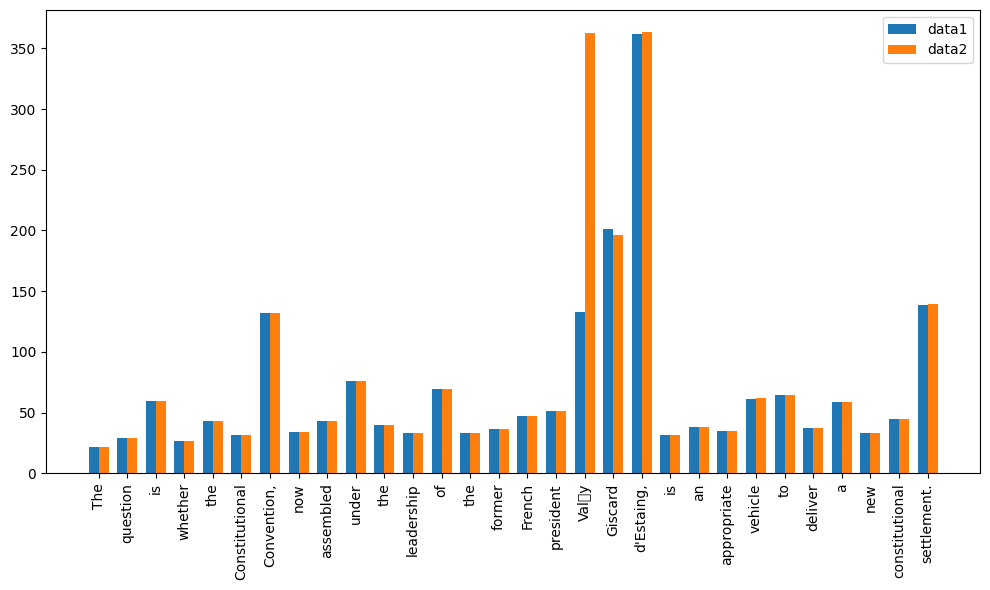

In [26]:
visualise_diff(orig,normalize, 0,2,28)

Examining the project files further, we can see that the problematic encoding is not only in `tokens.json` ---which is a processed file--- but also in the original datafiles (such as in `data/DC/dundee_corpus_utf8/sa02ma2p.dat`). Given this, there is a substantial posibility this issue was created at some point when exporting to share the data.

In [30]:
with open("data/DC/tokens.json") as file:
    edit_list = dict()
    lines = file.readlines()
    tokens = json.loads(' '.join(lines).replace('\\', '\\\\'))
    for article in tokens:
        for sentence in tokens[article]:
            for token in sentence:
                if '\\' in token:
                    print(sentence)
                    print(token)
                    edit_list[token] = None
print(edit_list)

['The', 'question', 'is', 'whether', 'the', 'Constitutional', 'Convention,', 'now', 'assembled', 'under', 'the', 'leadership', 'of', 'the', 'former', 'French', 'president', 'Val\\uff33y', 'Giscard', "d'Estaing,", 'is', 'an', 'appropriate', 'vehicle', 'to', 'deliver', 'a', 'new', 'constitutional', 'settlement.']
Val\uff33y
['The', 'more', 'serious', 'drawback', 'with', 'Mr', 'Giscard', 'is', 'simply', 'the', 'suspicion', 'that', 'he', 'will', 'guide', 'the', 'convention', 'in', 'a', 'direction', 'that', 'reflects', 'the', 'traditional', 'French', 'approach', 'to', 'governance', 'not', 'so', 'much', 'libert', 'fraternit', 'egalit', 'as', '\\uff2ditisme,', 'dirigisme,', 'technocratie.']
\uff2ditisme,
['The', 'danger', 'is', 'that', 'Mr', 'Giscard,', 'a', 'typical', 'product', 'of', 'the', 'French', '\\uff2dite,', 'will', 'simply', 'want', 'to', 'give', 'us', "'more", 'of', 'the', "same',", 'but', 'with', 'a', 'much', 'stronger', 'centre.']
\uff2dite,
['Too', 'folksy,', 'too', 'naturalisti

Based on context, we can manually correct it. We create two versions, one with accented letters and the other one without as both options seems a possible option for the original data.

In [31]:
edit_list1 = {
    'Val\\uff33y': 'Valéry',
    '\\uff2ditisme,': 'étatisme,',
    '\\uff2dite,': 'élite,',
    'na\\u4e45e:': 'naïve:',
    'Ars\\u7a6be': 'Arsène',
    '\\uff2eigr': 'émigré',
    '\\uff2einence': 'présidence',
    'fa\\u3322de,': 'façade,',
    'm\\u30f9\\uff26': 'mûle F',
    'na\\u4e45et': 'naïvet',
    'Fran\\u339cis': 'François',
    'Na\\u4e45e?': 'Naïve?',
    'na\\u4e45e.': 'naïve.',
    'Herm\\u90ed': 'Hermès',
    'Poil\\u30cfe.': 'Poilâne.',
    'Poil\\u30cfe': 'Poilâne',
    '\\uff2dite': 'élite',
    'Bj\\u6392k': 'Björk',
    'clich\\uff34': 'cliché',
    'Lumi\\u8f03e': 'Lumière',
    'M\\uff2di\\u90ed': 'Médié',
    'fa\\u3322de.': 'façade.',
    'Se\\u3001or': 'Señor',
}

edit_list2 = {
    'Val\\uff33y': 'Valery',
    '\\uff2ditisme,': 'etatisme,',
    '\\uff2dite,': 'elite,',
    'na\\u4e45e:': 'naive:',
    'Ars\\u7a6be': 'Arsene',
    '\\uff2eigr': 'emigre',
    '\\uff2einence': 'presidence',
    'fa\\u3322de,': 'facade,',
    'm\\u30f9\\uff26': 'mule F',
    'na\\u4e45et': 'naivet',
    'Fran\\u339cis': 'Francois',
    'Na\\u4e45e?': 'Naive?',
    'na\\u4e45e.': 'naive.',
    'Herm\\u90ed': 'Hermes',
    'Poil\\u30cfe.': 'Poilane.',
    'Poil\\u30cfe': 'Poilane',
    '\\uff2dite': 'elite',
    'Bj\\u6392k': 'Bjork',
    'clich\\uff34': 'cliche',
    'Lumi\\u8f03e': 'Lumiere',
    'M\\uff2di\\u90ed': 'Medie',
    'fa\\u3322de.': 'facade.',
    'Se\\u3001or': 'Senor',
}

Next, we create two new datasets with these corrections and run the pipeline to obtain new surprisal values.

In [ ]:
with open("data/DC/tokens.json") as file:
    text1 = ''.join(file.readlines())
    text2 = ''.join(file.readlines())

for key, value in edit_list1.items():
    text1 = text1.replace(key, value)
for key, value in edit_list2.items():
    text2 = text2.replace(key, value)

with open("data/DC/corrected_tokens.json",'w') as new_file:
    new_file.writelines(text1)
with open("data/DC/corrected_noaccent_tokens.json",'w') as new_file:
    new_file.writelines(text1)

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


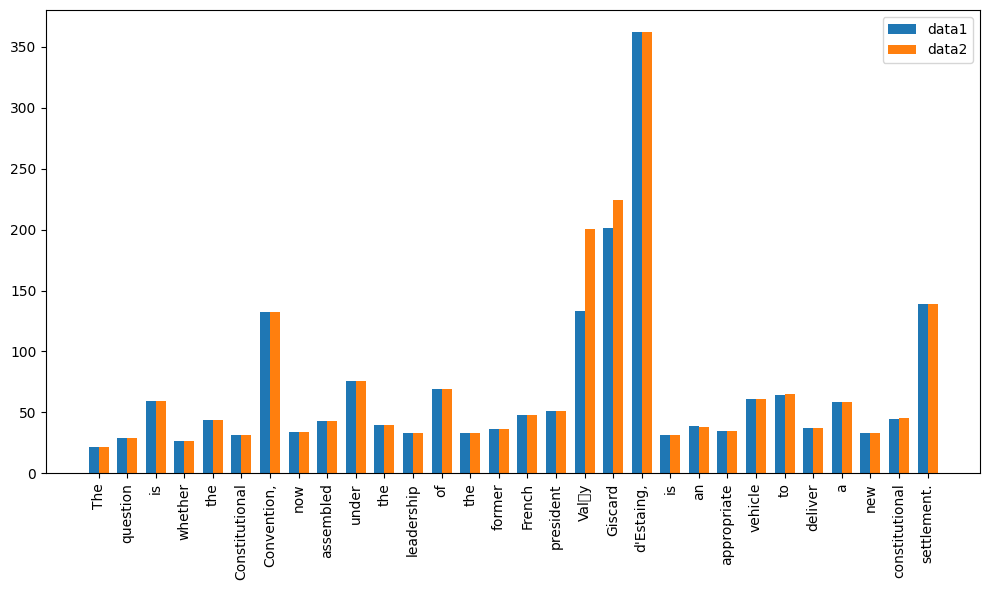

In [32]:
visualise_diff(orig,corrected, 0,2,28)

/var/folders/dz/p0ffcbb13_11sj2n_6nr0g780000gn/T/ipykernel_1826/1759088479.py:22: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/erikzeiner/anaconda3/envs/surprisal_internal_layers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


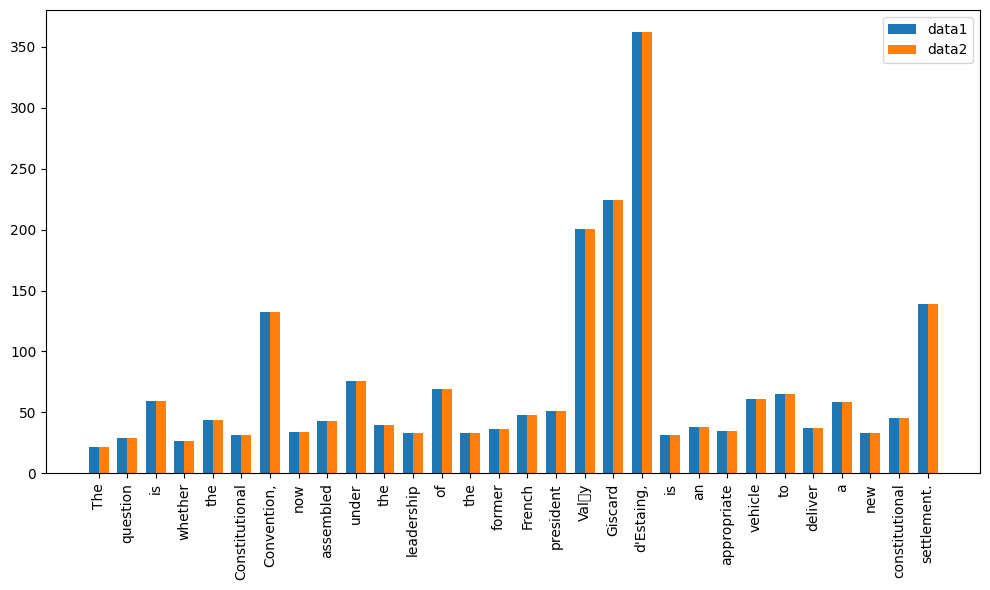

In [33]:
visualise_diff(corrected,corrected_noaccent, 0,2,28)

Unfortunately, we see that although the corrected version is closer to the original values than the previous attempts, the surprisal values still differ.
Furhtermore, there is no difference between the variants with and without accents.
In conclusion, further factors seemed to have been at play to cause this encoding issue which are not feesible to investage further without access to the original machine where the data was processed or at least its specifications.

The analysis above has been performed on the DC dataset for the gpt2 model. The following tests whether we encounter similar issues across the remaining datasets and models

In [6]:
datasets = sorted([dataset for dataset in os.listdir(r"./results/logit-lens/") if os.path.isdir(os.path.join(r"./results/logit-lens/", dataset))])
models = sorted([model for model in os.listdir(r"./results_orig/logit-lens/DC/") if os.path.isdir(os.path.join(r"./results_orig/logit-lens/DC/", model))])
overview = pd.DataFrame(columns=datasets, index=models)
overview

for dataset in os.listdir(r"./results/logit-lens/"):
    path = os.path.join(r"./results/logit-lens/", dataset)
    if os.path.isdir(path):
        for model in os.listdir(path):
            path2 = os.path.join(path, model)
            if os.path.isdir(path2):
                if 'helix_surprisal.json' in os.listdir(path2):
                    orig_path = path2.replace('/results/','/results_orig/')
                    with (open(orig_path+'/surprisal.json') as orig_file, open(path2+'/helix_surprisal.json') as new_file):
                        orig_file = json.load(orig_file)
                        new_file = json.load(new_file)
                        overview.loc[model,dataset] =  'Diff (Helix)' if len(diff_checker(orig_file,new_file)) > 0 else 'Same (Helix)'
                elif 'surprisal.json' in os.listdir(path2):
                        orig_path = path2.replace('/results/','/results_orig/')
                        with (open(orig_path+'/surprisal.json') as orig_file, open(path2+'/surprisal.json') as new_file):
                            orig_file = json.load(orig_file)
                            new_file = json.load(new_file)
                            overview.loc[model,dataset] =  'Diff' if len(diff_checker(orig_file,new_file)) > 0 else 'Same'
                elif 'colab_surprisal.json' in os.listdir(path2):
                        orig_path = path2.replace('/results/','/results_orig/')
                        with (open(orig_path+'/surprisal.json') as orig_file, open(path2+'/colab_surprisal.json') as new_file):
                            orig_file = json.load(orig_file)
                            new_file = json.load(new_file)
                            overview.loc[model,dataset] =  'Diff (Colab)' if len(diff_checker(orig_file,new_file)) > 0 else 'Same (Colab)'


Layer: 0
+---------+------------------------+------------------------+
|         | per sentence           | per token              |
+---------+------------------------+------------------------+
| average | -9.56473831086467e-07  | -7.739545364147987e-07 |
| min     | -5.213419596354167e-06 | -3.814697265625e-05    |
| max     | 3.814697265625e-06     | 3.0517578125e-05       |
+---------+------------------------+------------------------+
Layer: 1
+---------+-------------------------+-----------------------+
|         | per sentence            | per token             |
+---------+-------------------------+-----------------------+
| average | 4.127484112064571e-06   | 3.83498820852726e-06  |
| min     | -2.1674416281960227e-07 | -2.288818359375e-05   |
| max     | 1.738866170247396e-05   | 0.0001659393310546875 |
+---------+-------------------------+-----------------------+
Layer: 2
+---------+-----------------------+-----------------------+
|         | per sentence          | per token

In the table below, we can see an overview of whether the original results include values which differ from a later rerun. True means there is at least one layer which includes a value at least epsilon different.

In [7]:
overview

,DC,Fillers,MECO,M_N400,NS,S_N400,UCL,ZuCO
gpt2,Diff (Helix),Same (Helix),NaN,Same (Helix),Same (Helix),Same (Helix),Same (Helix),Same (Helix)
gpt2-large,Diff (Colab),Same (Colab),NaN,Same (Colab),Same (Colab),Same (Colab),Same (Colab),Same (Colab)
gpt2-medium,Diff (Colab),Same (Colab),NaN,Same (Colab),Same (Colab),Same (Colab),Same (Colab),Same (Colab)
gpt2-xl,Diff (Colab),Same (Colab),NaN,Same (Colab),Same (Colab),Same (Colab),Same (Colab),Same (Colab)
opt-1.3b,Diff,NaN,NaN,Same (Colab),Same (Helix),NaN,NaN,NaN
opt-125m,Diff (Helix),Same (Helix),NaN,Same (Helix),Same (Helix),Same (Helix),Same (Helix),Same (Helix)
opt-13b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opt-2.7b,NaN,NaN,NaN,NaN,NaN,Same (Helix),NaN,NaN
opt-30b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opt-6.7b,NaN,Same (Helix),NaN,NaN,Same (Helix),NaN,Same (Helix),NaN
